### **Setup Environment, Compile C++ Codes, and Import Dependencies**

This assignment requires us to understand and apply traditional image processing techniques. Considering the efficiency of pixel traversal, I plan to use C++ as the main language and then package it into a Python package to provide an API for use in a Python notebook. I am using the third-party library pybind11 to package the C++ code. If the packaging doesn’t work, you can place the provided package in the modules folder; this package is simply a compilation of the C++ code under the scripts directory.

In [1]:
!python compile.py

running build_ext
building 'image_processing' extension
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -I/opt/anaconda3/envs/data/lib/python3.12/site-packages/pybind11/include -Iscripts -I/opt/anaconda3/envs/data/include/python3.12 -c scripts/bind.cpp -o build/temp.macosx-11.0-arm64-cpython-312/scripts/bind.o -std=c++11
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -I/opt/anaconda3/envs/data/lib/python3.12/site-packages/pybind11/include -Iscripts -I/opt/anaconda3/envs/data/include/python3.12 -c scripts/image.cpp -o build/temp.macosx-11.0-arm64-cpython-312/scripts/image.o -std=c++11
clang++ -fno-strict-overflow -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/data/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/d

In [2]:
from modules import *

### **Image Processing**

Before proceeding with image processing, I encapsulated an `Image` class to store information about the image, including its height, width, bytes per pixel, raw data, and so on. I then specified that the methods for image processing must be static and return a new image to ensure that the original image information remains unchanged. This principle will always apply: the image's data is read-only and cannot be modified.

For detailed API information, please refer to the `README.md` file.

---

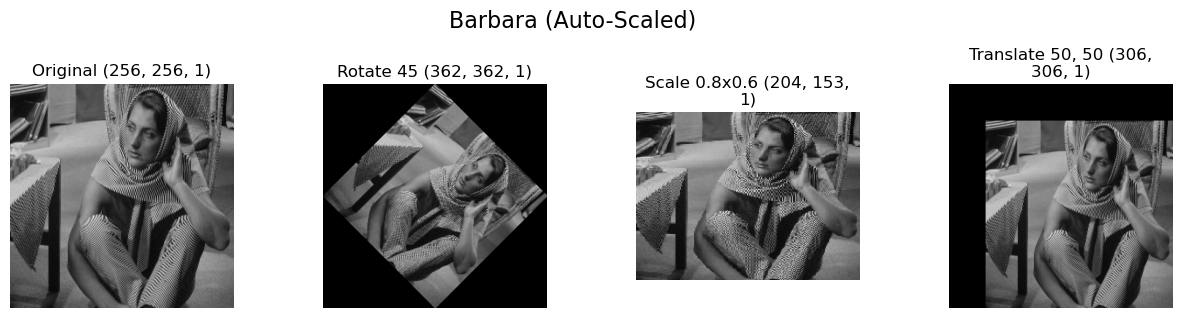

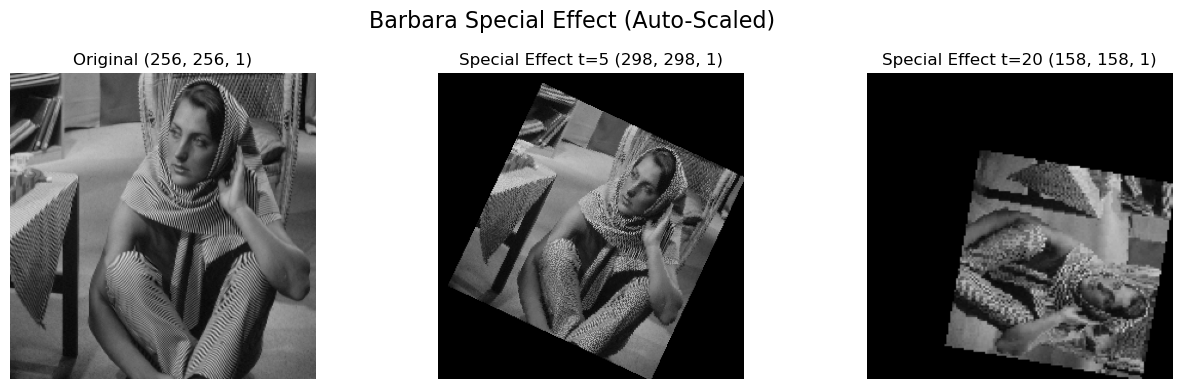

In [3]:
# Special Effect via Compound Linear Geometric Modification

barbara = Image(256, 256, 1)
barbara.load("images/HW3/barbara.raw")

barbara_rotate = Image.rotate(barbara, 45)
barbara_scale = Image.scale(barbara, 0.8, 0.6, "nearest")
barbara_translate = Image.translate(barbara, 50, 50)

show_images([barbara, barbara_rotate, barbara_scale, barbara_translate], [f"Original {barbara.raw_data.shape}", f"Rotate 45 {barbara_rotate.raw_data.shape}", f"Scale 0.8x0.6 {barbara_scale.raw_data.shape}", f"Translate 50, 50 {barbara_translate.raw_data.shape}"], "Barbara (Auto-Scaled)")

# Special Effect via Compound Linear Geometric Modification
def special_effect(img: Image, s: float, theta: float, m: int) -> Image:
    '''
    img: Image object
    s: float, shrinking percentage
    theta: float, rotation angle in degrees in clockwise direction
    m: int, translation distance towards south-east direction
    '''
    
    img = Image.scale(img, 1 - s, 1 - s, "nearest")
    img = Image.rotate(img, theta)
    img = Image.translate(img, m, m)
    
    return img
    
velocities = {
    "s": 0.03,
    "theta": 5,
    "m": 2
}

barbara_special_t5 = special_effect(barbara, velocities["s"] * 5, velocities["theta"] * 5, velocities["m"] * 5)
barbara_special_t20 = special_effect(barbara, velocities["s"] * 20, velocities["theta"] * 20, velocities["m"] * 20)

show_images([barbara, barbara_special_t5, barbara_special_t20], [f"Original {barbara.raw_data.shape}", f"Special Effect t=5 {barbara_special_t5.raw_data.shape}", f"Special Effect t=20 {barbara_special_t20.raw_data.shape}"], "Barbara Special Effect (Auto-Scaled)")

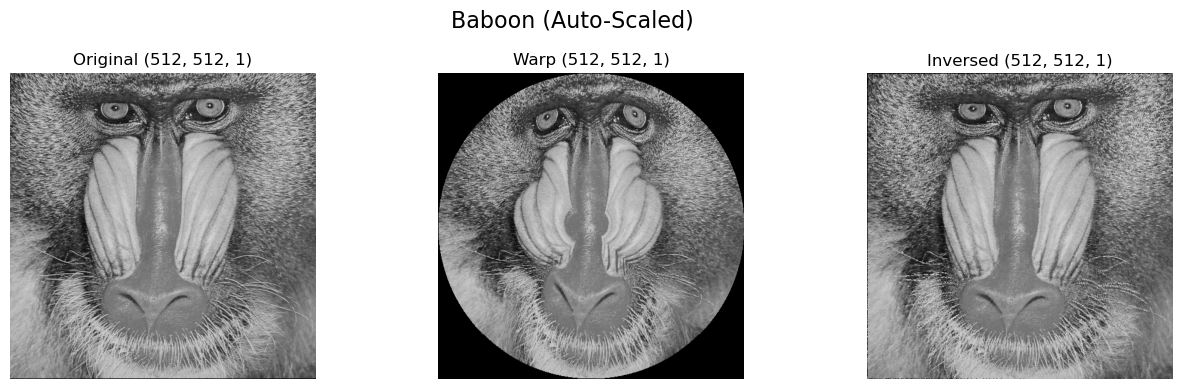

The MSE between the original and inversed image is 82.79218292236328


In [4]:
# Spatial warping techniques

baboon = Image(512, 512, 1)
baboon.load("images/HW3/baboon.raw")

baboon_warp = Image.circle_warp(baboon, False)
baboon_warp_inverse = Image.circle_warp(baboon_warp, True)

show_images([baboon, baboon_warp, baboon_warp_inverse], [f"Original {baboon.raw_data.shape}", f"Warp {baboon_warp.raw_data.shape}", f"Inversed {baboon_warp_inverse.raw_data.shape}"], "Baboon (Auto-Scaled)")
print("The MSE between the original and inversed image is", compare_images(baboon, baboon_warp_inverse))

In [17]:
# Texture Classification

sample1 = Image(64, 64, 1)
sample1.load("images/HW3/sample1.raw")
sample2 = Image(64, 64, 1)
sample2.load("images/HW3/sample2.raw")
sample3 = Image(64, 64, 1)
sample3.load("images/HW3/sample3.raw")
sample4 = Image(64, 64, 1)
sample4.load("images/HW3/sample4.raw")
sample5 = Image(64, 64, 1)
sample5.load("images/HW3/sample5.raw")
sample6 = Image(64, 64, 1)
sample6.load("images/HW3/sample6.raw")
sample7 = Image(64, 64, 1)
sample7.load("images/HW3/sample7.raw")
sample8 = Image(64, 64, 1)
sample8.load("images/HW3/sample8.raw")
sample9 = Image(64, 64, 1)
sample9.load("images/HW3/sample9.raw")
sample10 = Image(64, 64, 1)
sample10.load("images/HW3/sample10.raw")
sample11 = Image(64, 64, 1)
sample11.load("images/HW3/sample11.raw")
sample12 = Image(64, 64, 1)
sample12.load("images/HW3/sample12.raw")
sample13 = Image(64, 64, 1)
sample13.load("images/HW3/sample13.raw")
sample14 = Image(64, 64, 1)
sample14.load("images/HW3/sample14.raw")
sample15 = Image(64, 64, 1)
sample15.load("images/HW3/sample15.raw")

samples = [sample1, sample2, sample3, sample4, sample5, sample6, sample7, sample8, sample9, sample10, sample11, sample12, sample13, sample14, sample15]
Image.texture_cluster(samples, 0, 5)

[1, 1, 1, 2, 2, 2, 0, 0, 0, 3, 3, 3, 2, 2, 2]